![image.png](https://i.imgur.com/a3uAqnb.png)

# **⚡ Wind Turbine Object Detection with YOLOv8**
In this lab, we will:
✅ **Use YOLOv8** for **wind turbine detection**  
✅ **Understand the dataset structure**  
✅ **Train a YOLOv8 model**  
✅ **Evaluate the model on the validation set**  
✅ **Run inference on test images**  

---

## **1️⃣ Understanding the Dataset Structure**
The dataset follows the **YOLO format**, which consists of:
📂 **train/** → Training images & labels  
📂 **valid/** → Validation images & labels  
📂 **test/** → Test images (for inference)  
📜 **data.yaml** → Defines dataset paths & class names  

### **🔹 YOLO Dataset Folder Structure**
```
drone_dataset/
│── train/
│   │── images/
│   │   ├── pic_031.jpg
│   │   ├── pic_032.jpg
│   │   ├── ...
│   │── labels/
│   │   ├── pic_031.txt
│   │   ├── pic_032.txt
│   │   ├── ...
│
│── valid/
│   │── images/
│   │   ├── pic_035.jpg
│   │   ├── pic_036.jpg
│   │   ├── ...
│   │── labels/
│   │   ├── pic_035.txt
│   │   ├── pic_036.txt
│   │   ├── ...
│
│── test/
│   │── images/
│   │   ├── pic_040.jpg
│   │   ├── pic_041.jpg
│   │   ├── ...
│   │── labels/
│   │   ├── pic_040.txt
│   │   ├── pic_041.txt
│   │   ├── ...
│
│── data.yaml
```
Each **image** has a **corresponding label** file with the **same name**, but a `.txt` extension.

---

## **2️⃣ What’s Inside a YOLO Label File?**
Each `.txt` file contains **annotations** in this format:

```
<class_id> <x_center> <y_center> <width> <height>
```

✅ **All values are normalized** between **0 and 1**  
✅ The **bounding box** is defined by its **center** and **size**  

### **🔹 Example (`pic_031.txt`)**
```
0 0.526 0.448 0.12 0.15
1 0.731 0.602 0.18 0.22
```
- **First column** → Class ID (`0` = cable tower, `1` = turbine)  
- **Rest** → Bounding box (normalized)  

---

## **3️⃣ Loading the Dataset**

In [ ]:
# # Please uncomment this out when you are running this lab on google colab!
# import os

# # Set KaggleHub cache to a directory inside /content/
# os.environ["KAGGLEHUB_CACHE"] = "/content/data"

In [ ]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("kylegraupe/wind-turbine-image-dataset-for-computer-vision")

print("Path to dataset files:", path)

In [ ]:
# Load dataset configuration
dataset_path = path + "/data.yaml"

# Check dataset information
print(open(dataset_path).read())  # nc is numbe rof classes

## **4️⃣ Training a YOLOv8 Model**
We will fine-tune a **pretrained YOLOv8 model**.

In [ ]:
# Install Ultralytics library which has Yolo
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.3/915.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 882.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
# Load YOLOv8 model (small version)
model = YOLO("yolov8n.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 172MB/s]


#### Let's try to predict an image before training


image 1/1 /root/.cache/kagglehub/datasets/kylegraupe/wind-turbine-image-dataset-for-computer-vision/versions/12/test/images/windmill1_jpg.rf.35f47a69d0373596edb7578eea5151f6.jpg: 384x640 3 sheeps, 5 cows, 980.4ms
Speed: 23.8ms preprocess, 980.4ms inference, 37.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


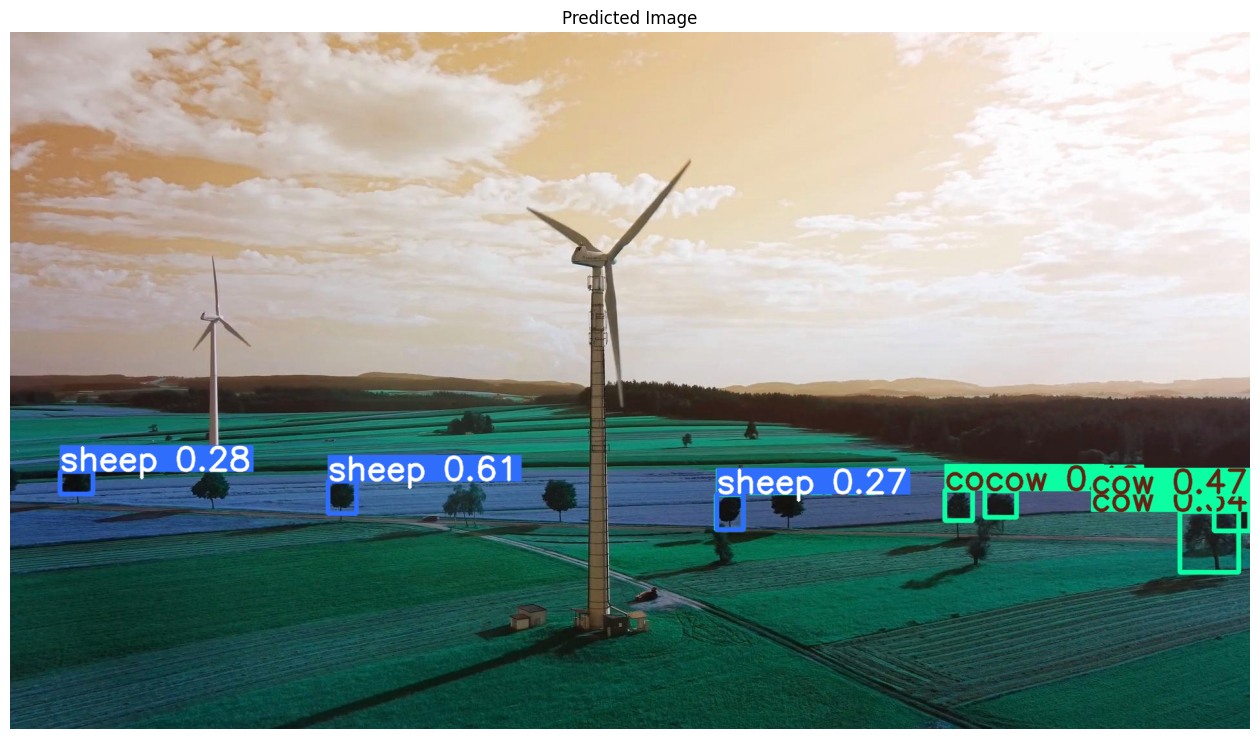

In [ ]:
# Load an image and run inference
results = model(path + "/test/images/windmill1_jpg.rf.35f47a69d0373596edb7578eea5151f6.jpg", save=True)

# Convert result to a NumPy array and display
predicted_image = results[0].plot()  # Convert prediction to an image

plt.figure(figsize=(16, 16))
plt.imshow(predicted_image)
plt.axis("off")
plt.title("Predicted Image")
plt.show()


## OMG, AI will take over the world.🫠
#### -Ali H 2/2/2025 at 11:06PM

#### Nevermind, let's train it! 🚀

In [ ]:
# Train on the wind turbine dataset
model.train(data=dataset_path, epochs=20, imgsz=640) # imgsz for transporser , and 640 عل حسب مودل

Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/root/.cache/kagglehub/datasets/kylegraupe/wind-turbine-image-dataset-for-computer-vision/versions/12/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fal

100%|██████████| 755k/755k [00:00<00:00, 12.3MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /root/.cache/kagglehub/datasets/kylegraupe/wind-turbine-image-dataset-for-computer-vision/versions/12/train/labels... 2643 images, 15 backgrounds, 0 corrupt: 100%|██████████| 2643/2643 [00:08<00:00, 324.40it/s]


train: New cache created: /root/.cache/kagglehub/datasets/kylegraupe/wind-turbine-image-dataset-for-computer-vision/versions/12/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /root/.cache/kagglehub/datasets/kylegraupe/wind-turbine-image-dataset-for-computer-vision/versions/12/valid/labels... 247 images, 1 backgrounds, 0 corrupt: 100%|██████████| 247/247 [00:00<00:00, 349.80it/s]


val: New cache created: /root/.cache/kagglehub/datasets/kylegraupe/wind-turbine-image-dataset-for-computer-vision/versions/12/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.683       1.78      1.457        238        640:  83%|████████▎ | 137/166 [1:26:26<18:40, 38.64s/it]

## **5️⃣ Evaluating the Model**
We use **mAP@0.5:0.95** to assess performance.

In [ ]:
# Run validation
metrics = model.val(data=dataset_path)

## **6️⃣ Running Inference on Test Images**


In [ ]:
# Load an image and run inference
model = YOLO(model.trainer.best)  # Use the best weights من نمبر of epoches
results = model(path + "/test/images/windmill1_jpg.rf.35f47a69d0373596edb7578eea5151f6.jpg", save=True)

# Convert result to a NumPy array and display
predicted_image = results[0].plot()  # Convert prediction to an image

plt.figure(figsize=(8, 8))
plt.imshow(predicted_image)
plt.axis("off")
plt.title("Predicted Image")
plt.show()


### 🚀 **Now you have a working YOLOv8 object detection pipeline for wind turbines!**

![image.png](https://i.imgur.com/rGGLEsK.png)

### Contributed by: Ali Habibullah & Mohamed Eltayeb